In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv("Boston House Price Data copy.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,PRICE,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,4.98,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,...,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00354,45.0,7.07,0.0,NaN,5.674,84.2,5.6733,1,311,...,7.45,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#data = pd.read_csv("Boston House Price Data.csv", index_col=False)
#data.head()

In [111]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [112]:
data.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.00354,45.0,7.07,0.0,NaN,5.674,84.2,5.6733,1,311,15.2,383.56,7.45,35.2
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [113]:
data.info()
#need to make some values here 0 to make question more interesting???

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    510 non-null    float64
 3   CHAS     509 non-null    float64
 4   NOX      508 non-null    float64
 5   RM       510 non-null    float64
 6   AGE      510 non-null    float64
 7   DIS      510 non-null    float64
 8   RAD      510 non-null    int64  
 9   TAX      510 non-null    int64  
 10  PTRATIO  510 non-null    float64
 11  B        510 non-null    float64
 12  LSTAT    510 non-null    float64
 13  PRICE    510 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.9 KB


In [114]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,509.000000,509.000000,510.000000,509.000000,508.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,3.592572,11.434185,11.100431,0.068762,0.554417,6.286406,68.434902,3.806709,9.505882,407.301961,18.445098,356.703878,12.626039,22.587157
std,8.580435,23.301327,6.850323,0.253298,0.115756,0.702662,28.221067,2.103098,8.689750,168.231186,2.164422,90.944602,7.124382,9.188062
min,0.003540,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081870,0.000000,5.145000,0.000000,0.449000,5.885500,44.550000,2.101425,4.000000,279.000000,17.075000,374.835000,6.950000,17.100000
50%,0.253560,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.239250,5.000000,330.000000,19.000000,391.340000,11.330000,21.200000
75%,3.673670,12.500000,18.100000,0.000000,0.624000,6.628000,93.975000,5.214600,24.000000,666.000000,20.200000,396.210000,16.930000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [115]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

#For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

data.head(10)
data.to_excel("Cleaned up Boston House Price Data.xlsx")


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     510 non-null    float64
 1   ZN       510 non-null    float64
 2   INDUS    510 non-null    float64
 3   CHAS     510 non-null    float64
 4   NOX      510 non-null    float64
 5   RM       510 non-null    float64
 6   AGE      510 non-null    float64
 7   DIS      510 non-null    float64
 8   RAD      510 non-null    int64  
 9   TAX      510 non-null    int64  
 10  PTRATIO  510 non-null    float64
 11  B        510 non-null    float64
 12  LSTAT    510 non-null    float64
 13  PRICE    510 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.9 KB


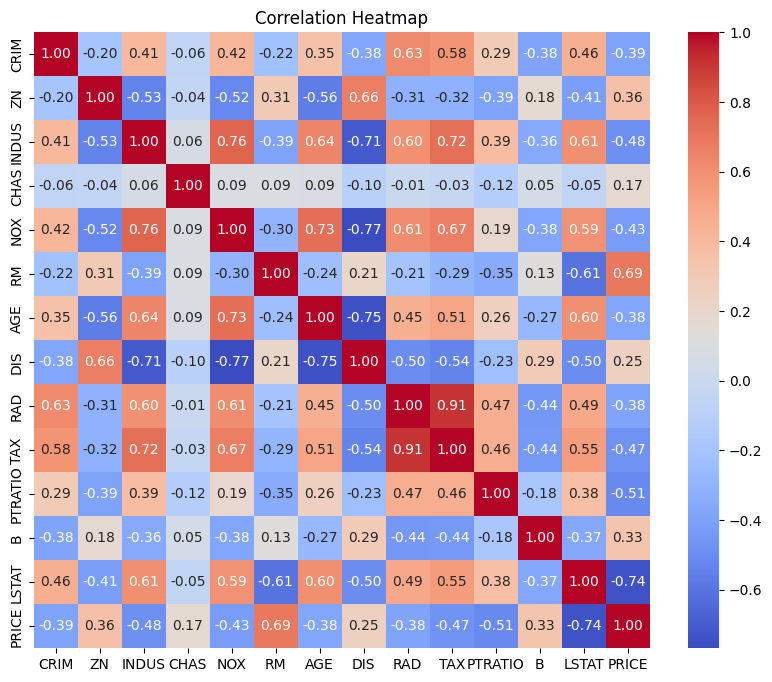

In [117]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True
)
plt.title("Correlation Heatmap")
plt.show()


Text(0.5, 1.0, 'RM - Testing Data')

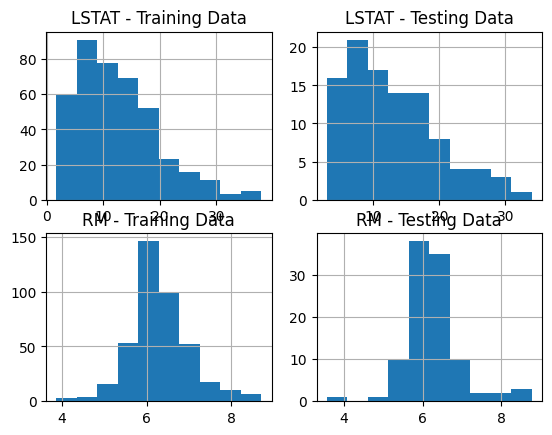

In [118]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle =True)

plt.subplot(2,2,1)
train_data['LSTAT'].hist()
plt.title('LSTAT - Training Data')

plt.subplot(2,2,2)
test_data['LSTAT'].hist()
plt.title('LSTAT - Testing Data')

plt.subplot(2,2,3)
train_data['RM'].hist()
plt.title('RM - Training Data')

plt.subplot(2,2,4)
test_data['RM'].hist()
plt.title('RM - Testing Data')


In [119]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 310 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     408 non-null    float64
 1   ZN       408 non-null    float64
 2   INDUS    408 non-null    float64
 3   CHAS     408 non-null    float64
 4   NOX      408 non-null    float64
 5   RM       408 non-null    float64
 6   AGE      408 non-null    float64
 7   DIS      408 non-null    float64
 8   RAD      408 non-null    int64  
 9   TAX      408 non-null    int64  
 10  PTRATIO  408 non-null    float64
 11  B        408 non-null    float64
 12  LSTAT    408 non-null    float64
 13  PRICE    408 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.8 KB


In [120]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 480 to 176
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  PRICE    102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target_column = 'PRICE'

x_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

x_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

x_scaled = ((xi - mean )/std. dev)

In [122]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) #reason it is different is bcs: it scales in proportion to training data only. here if we scaled test data too, it would have given data leakage

#example:  It's like calibrating a thermometer on Monday's temperature, then using that same calibration for Tuesday—not recalibrating it on Tuesday's temperature.

#x_train.head()
#reason: transform and fit_transform return numpy arrays which does not have head() method. Thats why we convert back to pandas

x_train = pd.DataFrame(x_train, columns=train_data.drop(columns=[target_column]).columns)
x_test = pd.DataFrame(x_test, columns=test_data.drop(columns=[target_column]).columns)
x_train.head()
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.119297,-0.502141,1.029665,-0.271448,0.508331,0.271664,0.885845,-0.697136,1.663954,1.542517,0.810281,0.430384,0.863859
1,0.757254,-0.502141,1.029665,-0.271448,1.602801,0.236121,0.928820,-0.845723,1.663954,1.542517,0.810281,-3.502268,1.606724
2,0.027679,-0.502141,1.029665,-0.271448,-0.203942,-0.090875,0.781988,-0.325435,1.663954,1.542517,0.810281,0.420584,0.049511
3,0.517523,-0.502141,1.029665,-0.271448,0.247743,0.078310,0.617250,-0.815388,1.663954,1.542517,0.810281,-3.052488,0.718089
4,-0.034367,-0.502141,1.029665,3.683942,1.411703,3.535937,0.502650,-0.884672,1.663954,1.542517,0.810281,-0.033539,-1.012927


In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test R2 value is {test_r2} and mean root mean squared error is {test_rmse}")

y_pred_train = model.predict(x_train)
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))


print(f"Train R2 value is {train_r2} and mean root mean squared error is {train_rmse}")

Test R2 value is 0.6771833644555224 and mean root mean squared error is 4.500766906253568
Train R2 value is 0.7455249006150367 and mean root mean squared error is 4.765835083355634


feature importance

In [125]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_})

print(feature_importance.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
5        RM     2.787722
8       RAD     2.446832
1        ZN     1.267228
11        B     0.850107
3      CHAS     0.662861
2     INDUS     0.138276
6       AGE    -0.074694
0      CRIM    -1.049754
9       TAX    -1.685192
4       NOX    -2.039600
10  PTRATIO    -2.151950
7       DIS    -3.223562
12    LSTAT    -3.775433


Coefficient value: Shows the direction (positive/negative) and magnitude of impact. A coefficient of 0.5 means a 1-unit increase in that feature increases price by 0.5 (in your scaled units).

In [126]:
intercept = model.intercept_
print(f"Intercept (Constant Term): {intercept:.4f}")



Intercept (Constant Term): 22.8614


In [127]:

print("\nLinear Regression Equation:")
print(f"y = {intercept:.4f}", end="")

for feature, coef in zip(x_train.columns, model.coef_):
    sign = "+" if coef >= 0 else ""
    print(f" {sign} ({coef:.4f}) * {feature}", end="")

print("\n")




Linear Regression Equation:
y = 22.8614  (-1.0498) * CRIM + (1.2672) * ZN + (0.1383) * INDUS + (0.6629) * CHAS  (-2.0396) * NOX + (2.7877) * RM  (-0.0747) * AGE  (-3.2236) * DIS + (2.4468) * RAD  (-1.6852) * TAX  (-2.1520) * PTRATIO + (0.8501) * B  (-3.7754) * LSTAT



In [128]:
df = pd.read_excel("Manual Data.xlsx")
example_idx = 0
test_df= df.drop(columns=['PRICE'])
example_data = test_df.iloc[example_idx]
predicted_price = model.predict([example_data.values])[0]
actual_price = y_test.iloc[example_idx]

print(f"Example Prediction:")
print(f"Predicted Price: ${predicted_price:.2f}")
print(f"Actual Price: ${actual_price:.2f}")
print(f"Error: ${abs(predicted_price - actual_price):.2f}")

Example Prediction:
Predicted Price: $-243.64
Actual Price: $16.70
Error: $260.34


c:\Users\adees\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
